In [1]:
# Hand pose detection Using MediaPipe Framework

In [2]:
#!pip install mediapipe

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Image
import mediapipe as mp
import copy

In [4]:
# Initialize functions for HandPose detection using mediapipe solutions
mp_drawing = mp.solutions.drawing_utils
mp_styles = mp.solutions.drawing_styles
mp_handpose = mp.solutions.hands

In [5]:
# show image
def getImageData(img_path):

  img = cv2.imread(img_path)
  img_width, img_height, _ = np.shape(img)
  return img, img_width, img_height

def showImageData(img):
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  plt.imshow(img)




In [6]:
# Detecting hand information from the image using Mediapipe library
# MediaPipe Hands processes an RGB image and returns the hand landmarks and
# handedness (left v.s. right hand) of each detected hand.
hand_detection_model = mp_handpose.Hands(static_image_mode=True, max_num_hands=1,
                                         min_detection_confidence=0.5)

img_path = './data/hand1.jpg'
img, IMG_WIDTH, IMG_HEIGHT = getImageData(img_path)
handinfo = hand_detection_model.process(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [7]:
print("hand info detected: ", handinfo.multi_handedness)


hand info detected:  [classification {
  index: 1
  score: 0.9063176512718201
  label: "Right"
}
]


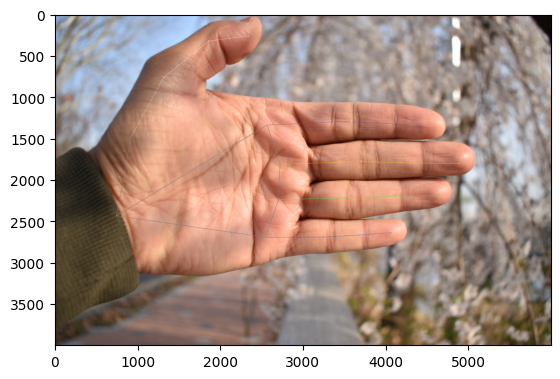

In [8]:
# drawing important landmarks from the hand in overlapped way
for hand_landmarks in handinfo.multi_hand_landmarks:
  img_copy = copy.deepcopy(img)
  mp_drawing.draw_landmarks(img_copy, hand_landmarks, mp_handpose.HAND_CONNECTIONS,
                            mp_styles.get_default_hand_landmarks_style(),
                            mp_styles.get_default_hand_connections_style())
  plt.imshow(cv2.cvtColor(img_copy, cv2.COLOR_BGR2RGB))
  plt.show()

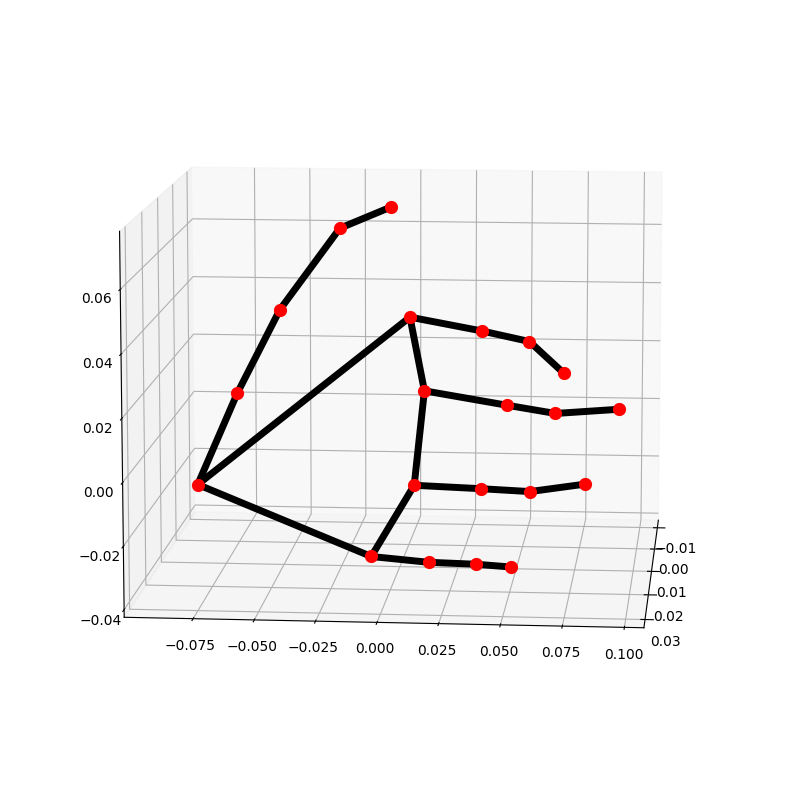

In [9]:
# Drawing 3D visualization of the Hand landmark points
for hand_world_landmarks in handinfo.multi_hand_world_landmarks:
  mp_drawing.plot_landmarks(hand_world_landmarks, connections=mp_handpose.HAND_CONNECTIONS,
                            azimuth=5)

In [11]:
import ipywidgets as widgets
import threading

In [22]:
# button for inplace opening of webcam
stopButton = widgets.ToggleButton(
    value=False,
    description='Stop',
    disabled=False,
    button_style='danger', # 'success', 'info', 'warning', 'danger' or ''
    tooltip='Description',
    icon='square'
)


# Display function for handpose detection in webcam video
def view(stopButton):
    cap = cv2.VideoCapture(0)
    display_handle=display(None, display_id=True)

    with mp_handpose.Hands(static_image_mode=False,
                           max_num_hands=1,
                           min_detection_confidence=0.5) as hands:

                           i=0
                           while True:

                            _, frame = cap.read()
                            frame = cv2.flip(frame, 1) # incase camera reverses your image
                            #frame.flags.writeable = False
                            frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
                            handinfo = hands.process(frame)

                            # drawing finger annotations of the hand
                            #frame.flags.writeable = True
                            frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

                            if handinfo.multi_hand_landmarks:
                              for hand_landmarks in handinfo.multi_hand_landmarks:
                                mp_drawing.draw_landmarks(img_copy,
                                                          hand_landmarks,
                                                          mp_handpose.HAND_CONNECTIONS,
                                                          mp_styles.get_default_hand_landmarks_style(),
                                                          mp_styles.get_default_hand_connections_style())

                            _, frame_img = cv2.imencode('.jpeg', frame)
                            display_handle.update(Image(data=frame_img.tobytes()))
                            if stopButton.value==True:
                              cap.release()
                              display_handle.update(None)

In [ ]:
# Run
# ================
display(stopButton)
thread = threading.Thread(target=view, args=(stopButton,))
thread.start()

In [ ]:
# Mediapipe involves multi-stage approach for Hand pose detection along with
# outlining the hand orientation and its finger points.

# 1. Palm Detection:
"""
It Uses SSD(Single Shot Detection model) for detecting the palm. Hand Palm is detected
and square bounding box is made around it. It uses 5 keypoints of the hand to detect
the area where palm is located in 2D plane.
Also, It is run only once in the beginning of the process. Later, Specific CNN
models are used to detect and draw other keypoints of the Hand (a total of 21 Key points).
"""

# Handbox is obtained from CV based tracking  like Kalman filter.


In [ ]:
# UseCases : Advanced Medical Surgery, Surveillance, Satellite Image Conituous Study,
# Robotics arms, Prosthetics, Autonomous driving etc.